In [108]:
import numpy as np
import matplotlib.pyplot as plt2
import ipywidgets as widgets

from scipy.fftpack import rfftfreq, rfft

from operator import add
from operator import sub
from operator import mul
from operator import truediv

from IPython.display import Audio
from IPython.display import display

In [109]:
%matplotlib notebook

<IPython.core.display.Javascript object>


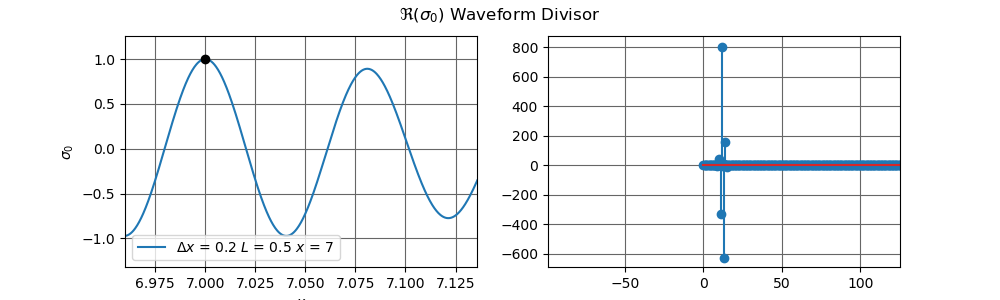

Options:
L is pulse height at dx.
Select x to display orbital.
Audio is from Real Part


interactive(children=(Dropdown(description='$\\Delta x$:', index=2, options=(0.1, 0.15, 0.2, 0.25, 0.3, 0.35, …

In [116]:
x2 = np.linspace(0, 101, 400002)
fig, ax2= plt2.subplots(1,2, figsize=(10, 3))
plt2.suptitle('$\Re (\sigma_{0})$ Waveform Divisor')

def update_plot(dx2, L2, sx):
    
    #Set x range (x-0.5)<x<(x+0.5)
    xf=x2[int(400002*(sx-0.5)/101):int(400002*(sx+0.5)/101)]
    
    ax2[0].clear()
    ax2[1].clear()
    
    reD=[0]*400002
    imD=[0]*400002
    
    #Create list with waves X=2 to X=100
    wave2=list(range(2,101))
    
    for w2 in wave2:
  
        N2=-2*(w2**2)*np.log(L2)/((np.pi**2)*(dx2**2))
        N2=2*round(0.5*N2,0)
        
        reDw = ((np.cos(xf*np.pi/w2))**N2)*(np.cos(np.pi*N2*xf/w2))
        imDw = (-(np.cos(xf*np.pi/w2))**N2)*(np.sin(np.pi*N2*xf/w2))

        reD=list(map(add, reD, reDw))
        imD=list(map(add, imD, imDw))
        
    units2 = '$\Delta x$ = {} $L$ = {} $x$ = {}'
    
    countD=max(reD)
 
    ax2[0].plot(xf, reD, label=units2.format(dx2, L2, sx))
    ax2[0].legend(loc=3)
    ax2[0].set_xlabel('$x$')
    ax2[0].set_ylabel('$\sigma_{0}$')
    ax2[0].axis([(sx-0.5), (sx+0.5), -(countD+0.5),(countD+1)])
    ax2[0].grid(b=True, which='major', color='#666666', linestyle='-')
    ax2[0].plot([sx],[countD], color='black', marker='o')
    
    #FFT Signal
    freqs = rfftfreq(len(reD),d=xf[1]-xf[0])
    X = rfft(reD)
    
    ax2[1].stem(freqs,X, use_line_collection=True)
    ax2[1].grid(b=True, which='major', color='#666666', linestyle='-')
    
    plt2.show()
    
    display(Audio(reD, rate=30000))
    

print("Options:")
print("L is pulse height at dx.")
print("Select x to display orbital.")
print("Audio is from Real Part")

dx2 = widgets.Dropdown(options=[0.10,0.15, 0.20,0.25,0.30,0.35,0.40,0.45,0.5], value=0.2, description='$\Delta x$:')  
L2 = widgets.Dropdown(options=[0.10,0.15, 0.20,0.25,0.30,0.35,0.40,0.45,0.5], value=0.5, description='$L$:') 
sx = widgets.Dropdown(options=list(range(2,101)), description='$x$:')   


widgets.interactive(update_plot, dx2=dx2, L2=L2, sx=sx)

